In [1]:
using PyPlot
using LinearAlgebra
using Statistics

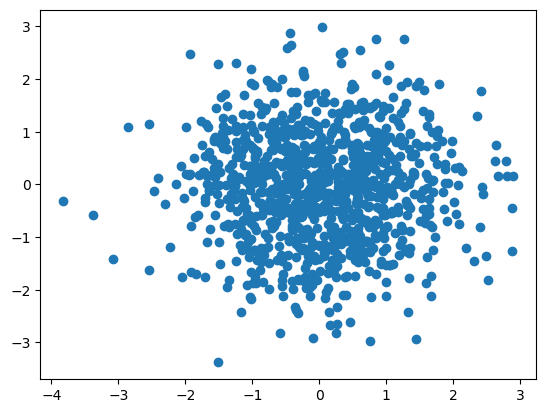

PyObject <matplotlib.collections.PathCollection object at 0x1407eb250>

In [44]:
# Generate a synthetic dataset, first for the simple case of d = 1.
d = 1;
n = 1024;
X = randn(d, n);
Y = randn(n);
scatter(X,Y)

In [45]:
# Solve the ormal equations to find the true optimum
A = mean(X[:,i]*X[:,i]' for i = 1:n);
b = mean(X[:,i]*Y[i] for i = 1:n);
w_opt = inv(A)*b;
println(w_opt)

[-0.0012831998579088313]


Define functions for the loss and its gradient. Two versions are provided, vector and matrix, to compare their efficiency.

In [46]:
# component loss function - vector version
function loss_fi(w, xi, yi)
    return (dot(xi,w) - yi)^2/2;
end
# component gradient function- vector version
function grad_fi(w, xi, yi)
    return xi*(dot(xi,w) - yi);
end
# total loss function - vector version
function loss_f(w, X, Y)
    (d, n) = size(X);
    return mean(loss_fi(w, X[:,i], Y[i]) for i = 1:n);
end
# total gradient function - vector version
function grad_f(w, X, Y)
    (d,n) = size(X);
    return mean(grad_fi(w, X[:,i], Y[i]) for i = 1:n);
end
# total loss function - matrix version
function matrix_loss_f(w, X, Y)
    (d,n) = size(X);
    return sum((X'*w - Y).^2)/(2*n);
end
# total gradient function - matrix version
function matrix_grad_f(w, X, Y)
    return X*(X'*w - Y)/n;
end

matrix_grad_f (generic function with 1 method)

Compare the two approaches for computing the loss.

In [47]:
w = randn(d);

println(loss_f(w, X, Y));
println(matrix_loss_f(w, X, Y));

println(grad_f(w, X, Y));
println(matrix_grad_f(w, X, Y));

1.2685975694690272
1.2685975694690275
[-1.2021563771487154]
[-1.2021563771487167]


In [48]:
@time grad_f(w, X, Y);
@time matrix_grad_f(w, X, Y);

  0.000806 seconds (3.07 k allocations: 288.062 KiB)
  0.000014 seconds (4 allocations: 16.438 KiB)


The matrix version is approximately 60X faster and requires 18X less storage.

We can now compare  Gradient Descent (GD) and Stochastic Gradient (SGD).  We will  measure the distance to the (known) optimum, `w_opt`, at each step.

In [49]:
function gradient_descent(w0::Vector{Float64}, X::Matrix{Float64}, Y::Vector{Float64},
        w_opt::Vector{Float64}, alpha::Float64, num_iters::Int64)
    error = zeros(num_iters)
    loss  = zeros(num_iters)
    w = w0
    for t = 1:num_iters
        w = w - alpha * matrix_grad_f(w, X, Y);
        error[t] = norm(w - w_opt);
        loss[t]  = matrix_loss_f(w, X, Y);
    end
    return (error, loss)
end

function stochastic_gradient_descent(w0::Vector{Float64}, X::Matrix{Float64}, Y::Vector{Float64},
        w_opt::Vector{Float64}, alpha::Float64, num_iters::Int64)
    (d,n) = size(X);
    error = zeros(num_iters)
    loss = zeros(num_iters)
    w = w0
    for t = 1:num_iters
        i = rand(1:n)
        w = w - alpha * grad_fi(w, X[:,i], Y[i]);
        error[t] = norm(w - w_opt);
        loss[t]  = matrix_loss_f(w, X, Y);
    end
    return (error, loss)
end

stochastic_gradient_descent (generic function with 1 method)

We fix:
- an initial guess far from the true solution
- a step-size, or learning rate $\alpha=0.1$
- a limit of 1000 iterations

In [50]:
w0 = [5.0];
alpha = 0.1;
num_iters = 1000;
(gd_dist, gd_loss) = gradient_descent(w0, X, Y, w_opt, alpha, num_iters);
(sgd_dist, sgd_loss) = stochastic_gradient_descent(w0, X, Y, w_opt, alpha, num_iters);

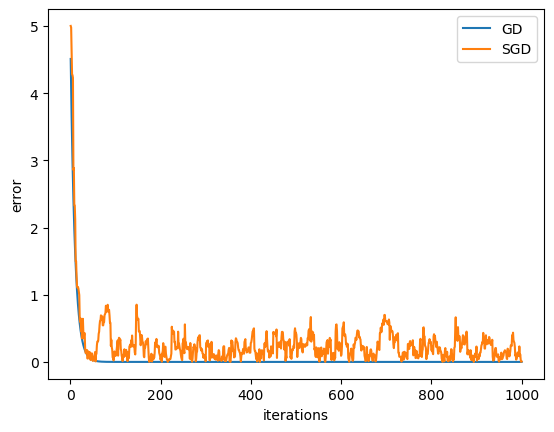

In [51]:
plot(1:num_iters, gd_dist; label="GD");
plot(1:num_iters, sgd_dist; label="SGD")
xlabel("iterations");
ylabel("error");
legend();

A log plot will be better here.

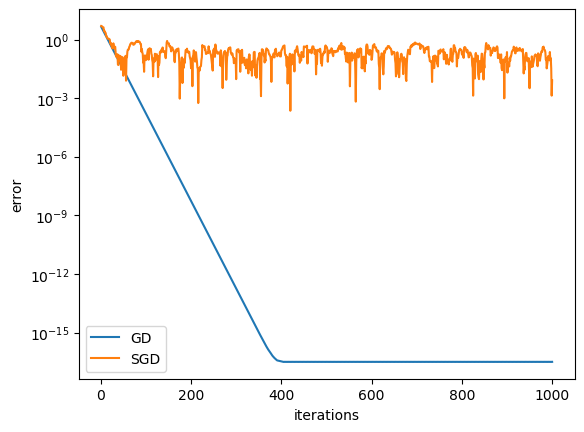

In [52]:
semilogy(1:num_iters, gd_dist; label="GD");
semilogy(1:num_iters, sgd_dist; label="SGD")
xlabel("iterations");
ylabel("error");
legend();

We observe that the Stochastic Gradient does not descend below an error of approximately $0.01.$ This the well-known phenomenon of "noise ball" convergence. It cam be remedied by adjusting the learning rate--see below.

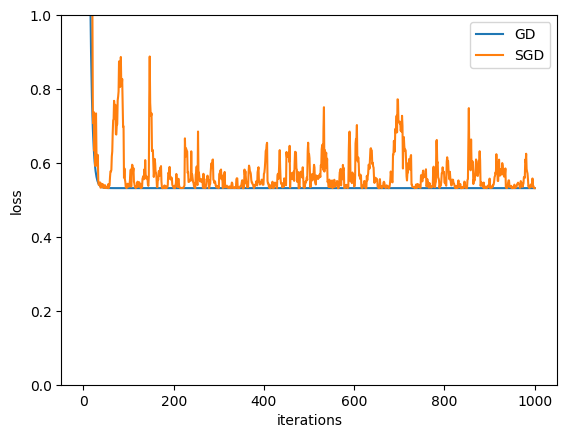

In [53]:
plot(1:num_iters, gd_loss; label="GD");
plot(1:num_iters, sgd_loss; label="SGD")
xlabel("iterations");
ylabel("loss");
legend();
ylim((0,1));

The loss has an asymptotic value.

In higher dimensions, the SGD converges more slowly than SD.

In [54]:
d = 100;
n = 1024;
X = randn(d, n);
Y = randn(n);

A = mean(X[:,i]*X[:,i]' for i = 1:n);
b = mean(X[:,i]*Y[i] for i = 1:n);
w_opt = inv(A)*b;

In [55]:
w0 = 2 * randn(100);
alpha = 0.01;
num_iters = 5000;
(gd_dist, gd_loss) = gradient_descent(w0, X, Y, w_opt, alpha, num_iters);
(sgd_dist, sgd_loss) = stochastic_gradient_descent(w0, X, Y, w_opt, alpha, num_iters);

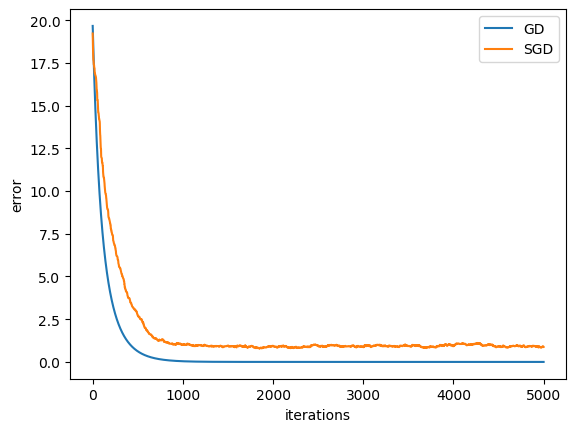

In [56]:
plot(1:num_iters, gd_dist; label="GD");
plot(1:num_iters, sgd_dist; label="SGD")
xlabel("iterations");
ylabel("error");
legend();

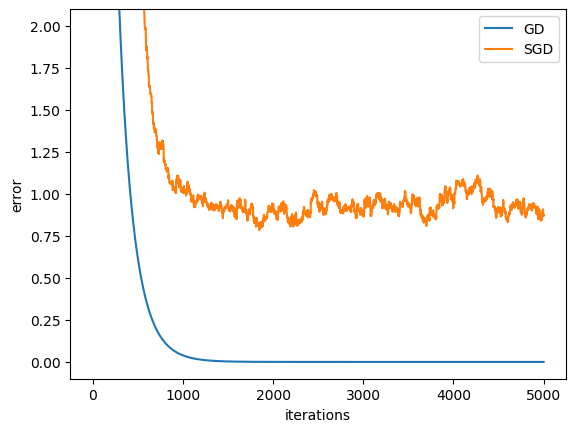

In [57]:
plot(1:num_iters, gd_dist; label="GD");
plot(1:num_iters, sgd_dist; label="SGD")
xlabel("iterations");
ylabel("error");
legend();
ylim([-0.1,2.1]);

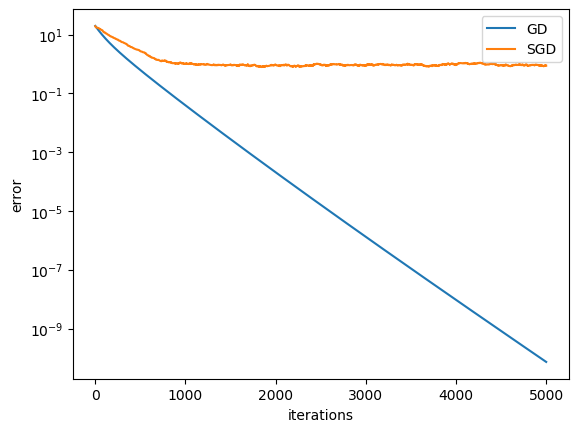

In [58]:
semilogy(1:num_iters, gd_dist; label="GD");
semilogy(1:num_iters, sgd_dist; label="SGD")
xlabel("iterations");
ylabel("error");
legend();

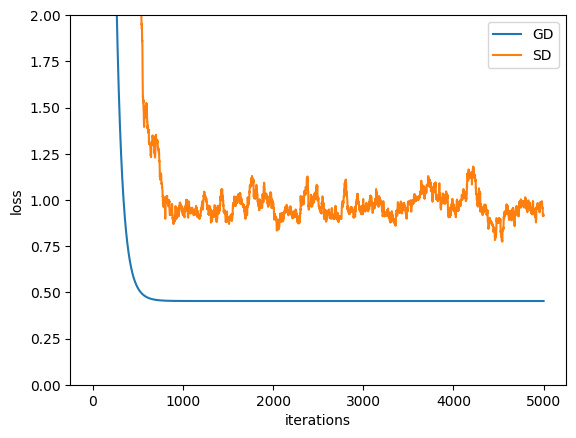

In [30]:
plot(1:num_iters, gd_loss; label="GD");
plot(1:num_iters, sgd_loss; label="SGD")
xlabel("iterations");
ylabel("loss");
legend();
ylim((0,2));

Reduce the learning rate and rerun the optimization.

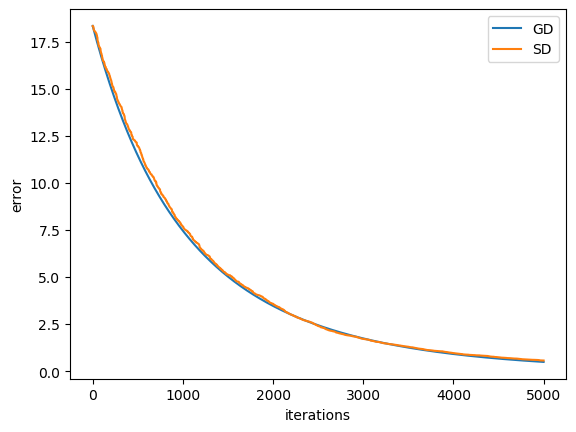

In [32]:
alpha = 0.001;
num_iters = 5000;
(gd_dist, gd_loss) = gradient_descent(w0, X, Y, w_opt, alpha, num_iters);
(sgd_dist, sgd_loss) = stochastic_gradient_descent(w0, X, Y, w_opt, alpha, num_iters);
#
plot(1:num_iters, gd_dist; label="GD");
plot(1:num_iters, sgd_dist; label="SGD")
xlabel("iterations");
ylabel("error");
legend();
#ylim([-0.1,2.1]);

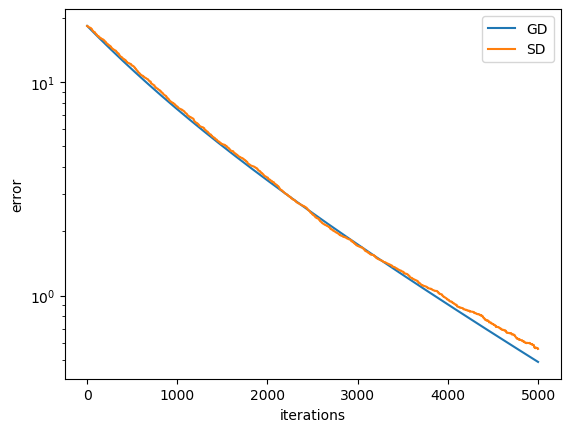

In [33]:
semilogy(1:num_iters, gd_dist; label="GD");
semilogy(1:num_iters, sgd_dist; label="SGD")
xlabel("iterations");
ylabel("error");
legend();